In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = 'Resources/diabetes_data.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Importance

In [4]:
# Feature Importance
# What features are considered important?
# guided by https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression().fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': mdl.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

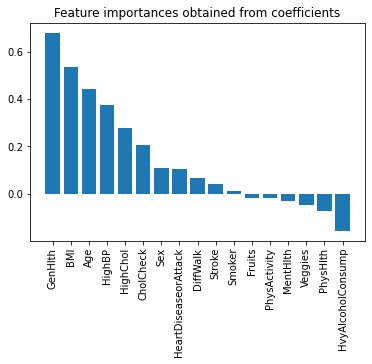

In [5]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

According to the data, GenHlth, BMI, Age, HighBP, and CholCheck are the features that have a bigger affect on the outcome of predicting diabetes in a patient.

Interestingly, heavy alcholol consumption has a negative correlation to predicting diabetes.

# Data Exploration

In [7]:
# What is the correlation of Age and Diabetes?
corr = df['Age'].corr(df['Diabetes'])
corr

0.27873806628190145

Age and diabetes have a very weak correlation. 

In [8]:
# What is the correlation of Sex and Diabetes?
# "Does gender affect diabetes?"
corr = df['Sex'].corr(df['Diabetes'])
corr

0.04441285837125938

Sex and Diabetes have little to no correlation.

# Machine Learning

In [9]:
# extracting important features
# Would leaving in PhysHealth, and HvyAlcoholConsump help our model train?
# Because if we leave it in there it would tell the model something along the lines of
# "if it has this feature, they probably don't."
unimportant_features_df = df[['Fruits','MentHlth','PhysActivity','Veggies','PhysHlth','HvyAlcoholConsump']]
important_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Sex', 'HeartDiseaseorAttack', 'DiffWalk', 'Stroke']]

In [10]:
# Train the Logistic Regression model using the orignal dataframe
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [11]:
# Calculated the balanced accuracy score of the orignal dataframe
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7456585194980179

In [12]:
# Display the confusion matrix of the orignal dataframe
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6386, 2451],
       [2044, 6792]], dtype=int64)

In [13]:
# Print the imbalanced classification report of the orignal dataframe
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.76      0.72      0.77      0.74      0.75      0.55      8837
        1.0       0.73      0.77      0.72      0.75      0.75      0.56      8836

avg / total       0.75      0.75      0.75      0.75      0.75      0.56     17673



In [14]:
# extracting top 6 important features
top6_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck']]

#Scaling the Data with the important features used above
X_important = top6_features_df
y_important = df['Diabetes']
X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_important, y_important)

scaler = StandardScaler()
X_important_train_scaled = scaler.fit_transform(X_important_train)
X_important_test_scaled = scaler.transform(X_important_test)

In [15]:
# Train the Logistic Regression model using the important dataframe
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_important_train_scaled, y_important_train)

LogisticRegression(random_state=1)

In [16]:
# Calculated the balanced accuracy score of the important dataframe
y_important_pred = model.predict(X_important_test_scaled)
balanced_accuracy_score(y_important_test, y_important_pred)

0.7388071092903747

In [17]:
# Display the confusion matrix of the important dataframe
confusion_matrix(y_important_test, y_important_pred)

array([[6369, 2491],
       [2126, 6687]], dtype=int64)

In [18]:
# Print the imbalanced classification report of the important dataframe
print(classification_report_imbalanced(y_important_test, y_important_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.72      0.76      0.73      0.74      0.54      8860
        1.0       0.73      0.76      0.72      0.74      0.74      0.55      8813

avg / total       0.74      0.74      0.74      0.74      0.74      0.55     17673



Extracting important features barely effected results of the accuracy of the logicsitc regression model.

The actual machine learning model will likely have a bigger impact on predictions than the columns included or not.